In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
df = sns.load_dataset("iris") 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data = torch.tensor(df[df.columns[:-1]].values).float()
labels = torch.zeros(df.shape[0], dtype=torch.long)

labels[df.species == 'setosa'] = 0
labels[df.species == 'versicolor'] = 1
labels[df.species == 'virginica'] = 2

In [4]:
def createIrisModel(nHiddenLayers):

    model = nn.Sequential(
        nn.Linear(4, nHiddenLayers),
        nn.ReLU(),
        nn.Linear(nHiddenLayers, nHiddenLayers),
        nn.ReLU(),
        nn.Linear(nHiddenLayers,3),
    )

    lossfun = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    numepochs = 1000
    losses = torch.zeros(numepochs)
    ongoingAcc = torch.zeros(numepochs)

    for epochi in range(numepochs):
        yhat = model(data)
        loss = lossfun(yhat,labels)
        losses[epochi] = loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        l = torch.argmax(yhat, dim=1)
        acc = (l==labels).float().mean()
        ongoingAcc[epochi] = acc

    return losses, ongoingAcc

In [5]:
losses = []
ongoingAcc = []

for i in range(1, 128):
    loss, acc = createIrisModel(i)
    losses.append(loss.mean())
    ongoingAcc.append(acc.mean())


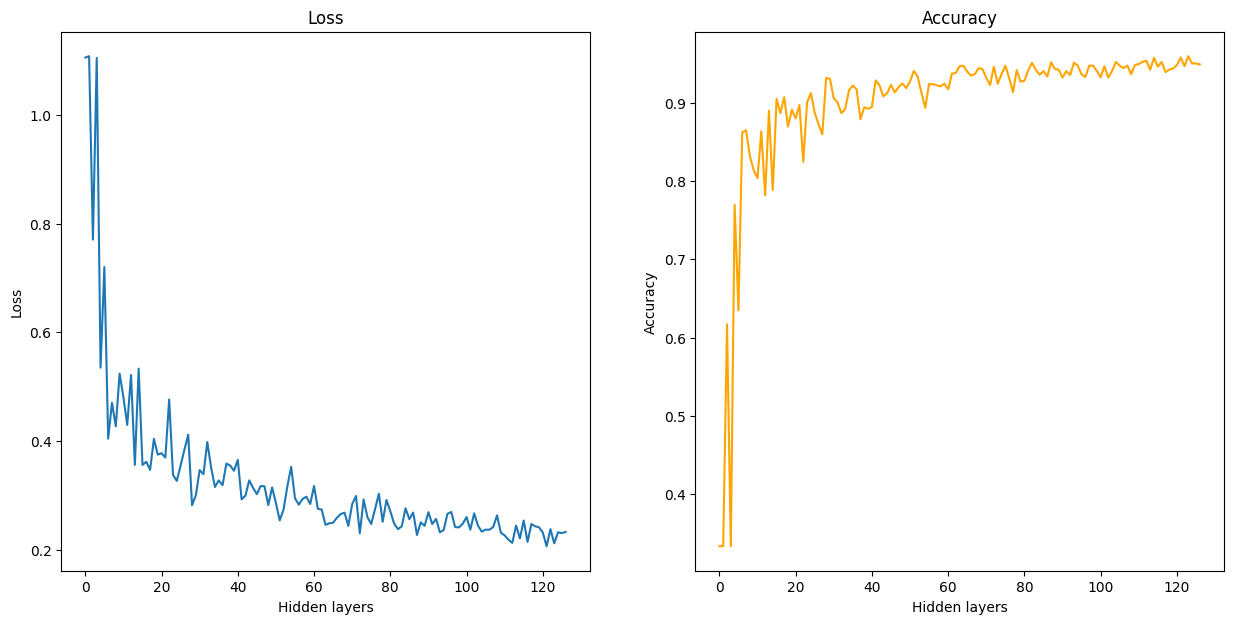

In [6]:
fig, axes = plt.subplots(1, 2,figsize=(15,7))
axes[0].plot(losses)
axes[0].set_xlabel("Hidden layers")
axes[0].set_ylabel("Loss")
axes[0].set_title("Loss")

axes[1].plot(ongoingAcc, "orange")
axes[1].set_xlabel("Hidden layers")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Accuracy")
plt.show()